# Now, I want to see the pm data of each province

In [1]:
import numpy as np
import pandas as pd

In [2]:
pm_map = pd.read_csv('../../data/a1/pm_map.csv')

In [3]:
list_of_pv = [col.split(' ')[-1] for col in pm_map.columns[1:]]
list_of_pv


pv_count = {}
for pv in list_of_pv:
    if pv in pv_count:
        pv_count[pv] += 1
    else:
        pv_count[pv] = 1


pv_count = dict(sorted(pv_count.items(), key=lambda item: item[1], reverse=True))
pv_count

{'กทม.': 12,
 'จ.ชลบุรี': 3,
 'จ.เชียงใหม่': 2,
 'จ.ขอนแก่น': 1,
 'จ.กาญจนบุรี': 1,
 'จ.ภูเก็ต': 1}

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/2864313023.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pv_count.values()), y=list(pv_count.keys()), palette="viridis")


Text(0, 0.5, 'PVs')

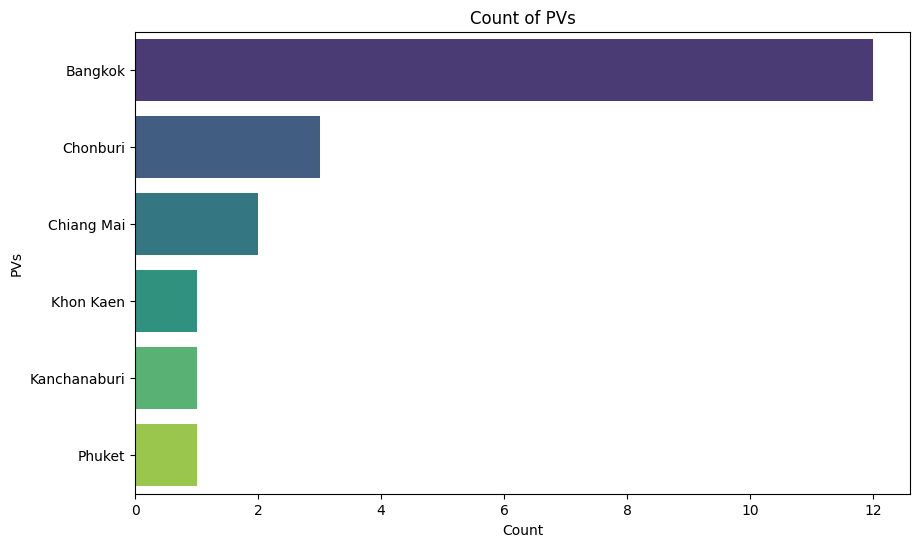

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

rename_map = {
    "กทม.": "Bangkok",
    "จ.ชลบุรี": "Chonburi",
    "จ.เชียงใหม่": "Chiang Mai",
    "จ.ขอนแก่น": "Khon Kaen",
    "จ.กาญจนบุรี": "Kanchanaburi",
    "จ.ภูเก็ต": "Phuket"
}

for old_key, new_key in rename_map.items():
    if old_key in pv_count:
        pv_count[new_key] = pv_count.pop(old_key)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(pv_count.values()), y=list(pv_count.keys()), palette="viridis")
plt.title('Count of PVs')
plt.xlabel('Count')
plt.ylabel('PVs')

So we knew that Bangkok, Chonburi and Chiang Mai is duplicated

Let's inspect Bangkok first

and of course, dont forget to resample to "monthly" na

In [5]:
def plot_pm2_5(c, avg):
    pm_map_local = pm_map.copy()
    pm_map_local["date"] = pd.to_datetime(pm_map_local["Date"])
    pm_map_local.set_index("date", inplace=True)
    
    pm_map_local = pm_map_local.loc[:, [col for col in pm_map_local.columns if col.split(" ")[-1] == c]]
    
    pm_map_local = pm_map_local.apply(pd.to_numeric, errors='coerce')
    
    pm_map_local = pm_map_local.resample("M").mean()

    if avg == 1:
        pm_map_local["avg"] = pm_map_local.mean(axis=1)
    
    pm_map_local.columns = [col.split(" ")[0] for col in pm_map_local.columns]

    # uncomment this if you want to see the data in limited time
    # pm_map_local = pm_map_local.loc["2020-01-01":"2022-12-31"]
    if avg == 1:
        pm_map_local["avg"].plot(figsize=(20, 10))
    else:
        pm_map_local.plot(figsize=(20, 10))
    plt.title(f"PM2.5")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.show()
    if avg == 1:
        return pm_map_local

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


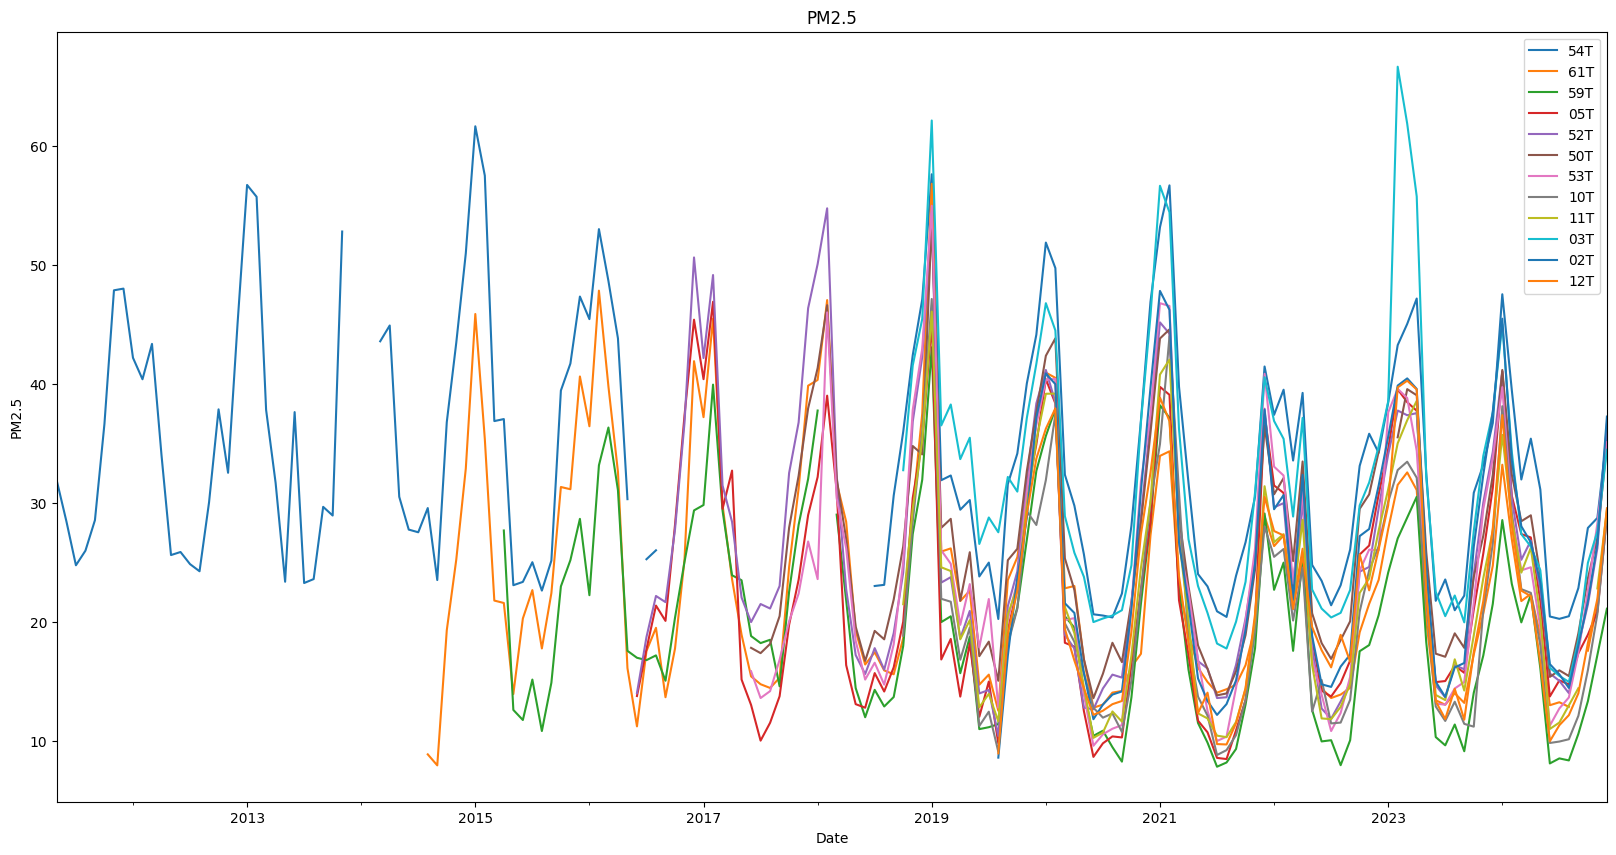

In [6]:
plot_pm2_5("กทม.", 0)

All are in the same trends, so it will average them all

And I want to know all the station so...

In [7]:
pm_map.loc[:, [col for col in pm_map.columns if col.split(" ")[-1] == "กทม."]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   54T |  แขวงดินแดง เขตดินแดง กทม.          3906 non-null   float64
 1   61T |  แขวงพลับพลา เขตวังทองหลาง กทม.     3557 non-null   float64
 2   59T |  แขวงพญาไท เขตพญาไท กทม.            3429 non-null   float64
 3   05T |  แขวงบางนา เขตบางนา กทม.            3021 non-null   float64
 4   52T | แขวงบางยี่เรือ เขตธนบุรี กทม.       3071 non-null   float64
 5   50T |  แขวงปทุมวัน เขตปทุมวัน กทม.        2700 non-null   float64
 6   53T |  แขวงวังทองหลาง เขตวังทองหลาง กทม.  2679 non-null   float64
 7   10T |  แขวงคลองจั่น เขตบางกะปิ กทม.       2153 non-null   float64
 8   11T |  แขวงดินแดง เขตดินแดง กทม.          2212 non-null   float64
 9   03T |  แขวงแสมดำ เขตบางขุนเทียน กทม.      2237 non-null   float64
 10  02T | แขวงหิรัญรูจี เขตธนบุรี กทม.  

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


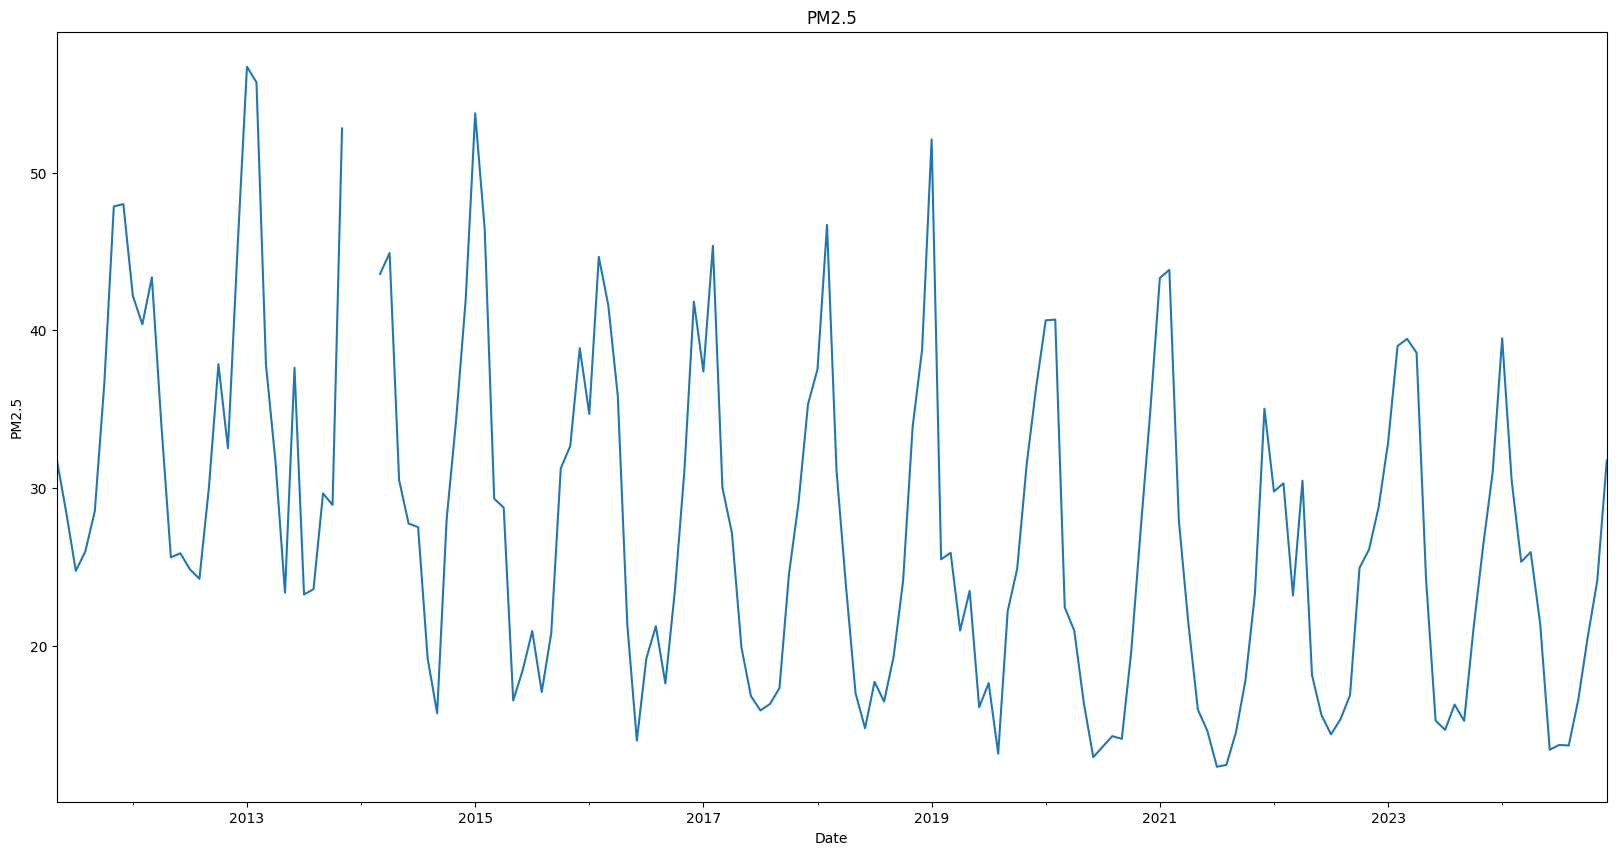

date
2011-05-31    31.812500
2011-06-30    28.433333
2011-07-31    24.741935
2011-08-31    25.967742
2011-09-30    28.533333
                ...    
2024-08-31    13.666329
2024-09-30    16.557140
2024-10-31    20.556375
2024-11-30    24.112953
2024-12-31    31.745992
Freq: ME, Name: avg, Length: 164, dtype: float64


In [8]:
pm_map_bangkok = plot_pm2_5("กทม.", 1)
series = pm_map_bangkok["avg"]
print(series)

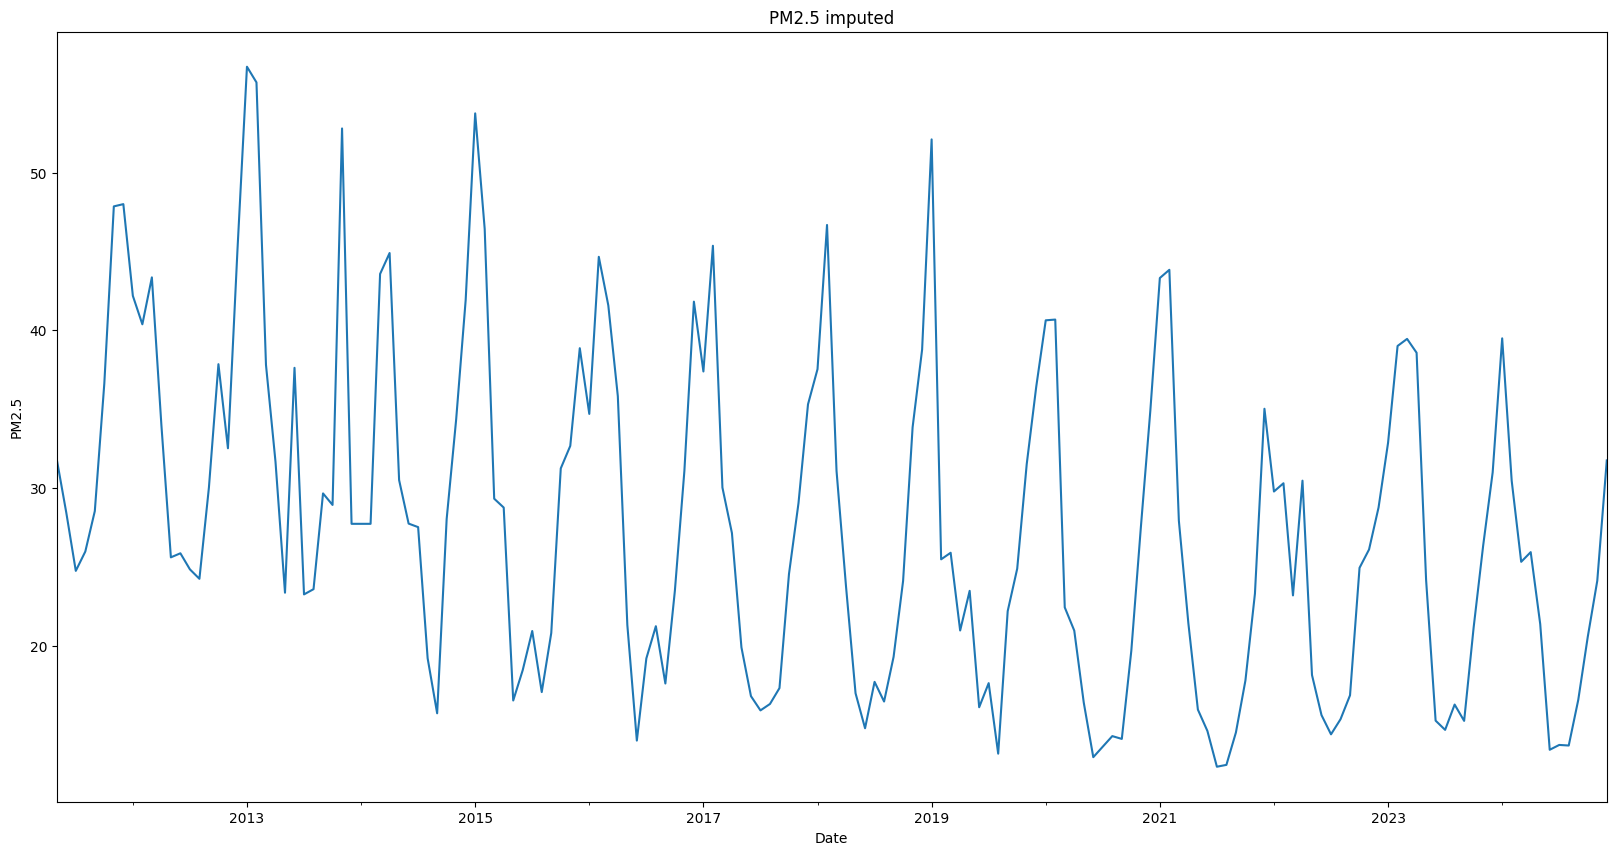

date
2011-05-31 00:00:00                                              31.8125
2011-06-30 00:00:00                                            28.433333
2011-07-31 00:00:00                                            24.741935
2011-08-31 00:00:00                                            25.967742
2011-09-30 00:00:00                                            28.533333
                                             ...                        
2024-09-30 00:00:00                                             16.55714
2024-10-31 00:00:00                                            20.556375
2024-11-30 00:00:00                                            24.112953
2024-12-31 00:00:00                                            31.745992
avg                    date
2011-05-31    31.812500
2011-06-30    28....
Name: avg, Length: 165, dtype: object


In [9]:
from sklearn.impute import KNNImputer
def imputed(series):
    imputer = KNNImputer(n_neighbors=5)
    imputed_series = imputer.fit_transform(series.values.reshape(-1, 1))
    imputed_series = pd.Series(imputed_series.flatten(), index=series.index)
    imputed_series.plot(figsize=(20, 10))
    plt.title("PM2.5 imputed")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.show()
    return imputed_series

imputed_series = series.copy()

imputed_series["avg"] = imputed(series)

print(imputed_series)

In [10]:
series.shape

(164,)

In [11]:
#show which row is null
series[series.isnull()]

date
2013-12-31   NaN
2014-01-31   NaN
2014-02-28   NaN
Freq: ME, Name: avg, dtype: float64

In [12]:
imputed_series.shape

(165,)

In [13]:
pm_map_bangkok["imputed"] = imputed_series
pm_map_bangkok.head()

,54T,61T,59T,05T,52T,50T,53T,10T,11T,03T,02T,12T,avg,imputed
date,,,,,,,,,,,,,,
2011-05-31,31.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.812500,31.8125
2011-06-30,28.433333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.433333,28.433333
2011-07-31,24.741935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.741935,24.741935
2011-08-31,25.967742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.967742,25.967742
2011-09-30,28.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.533333,28.533333


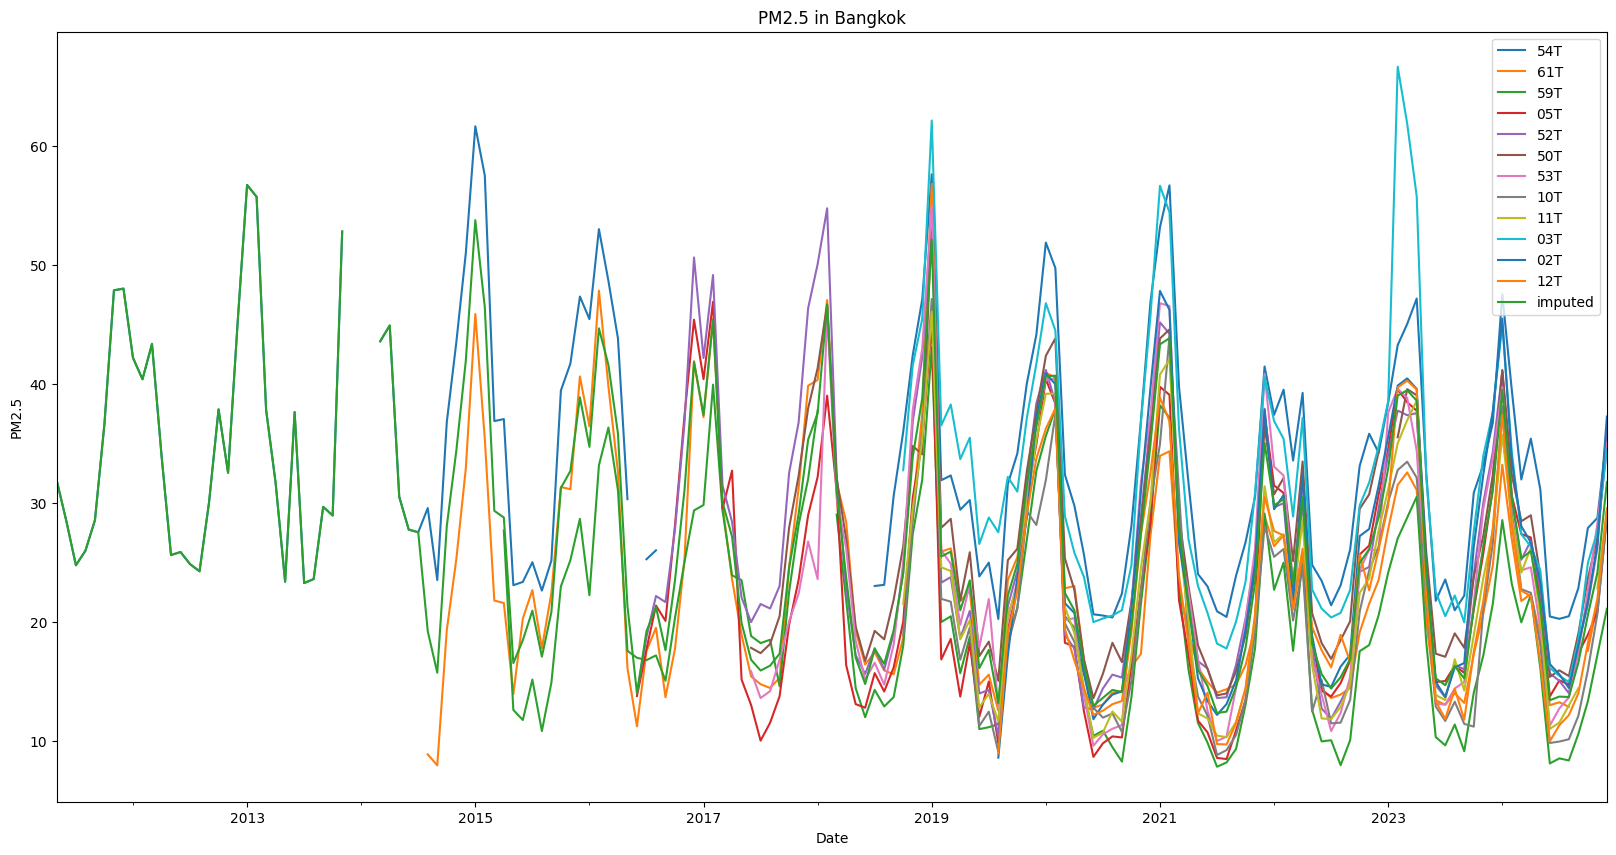

In [14]:
pm_map_bangkok.drop(columns=["avg"]).plot(figsize=(20, 10))
plt.title("PM2.5 in Bangkok")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

In [15]:
imputed_series.to_csv("../../data/a1/bkk_pm.csv")

it really is "average"

Let's do others

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


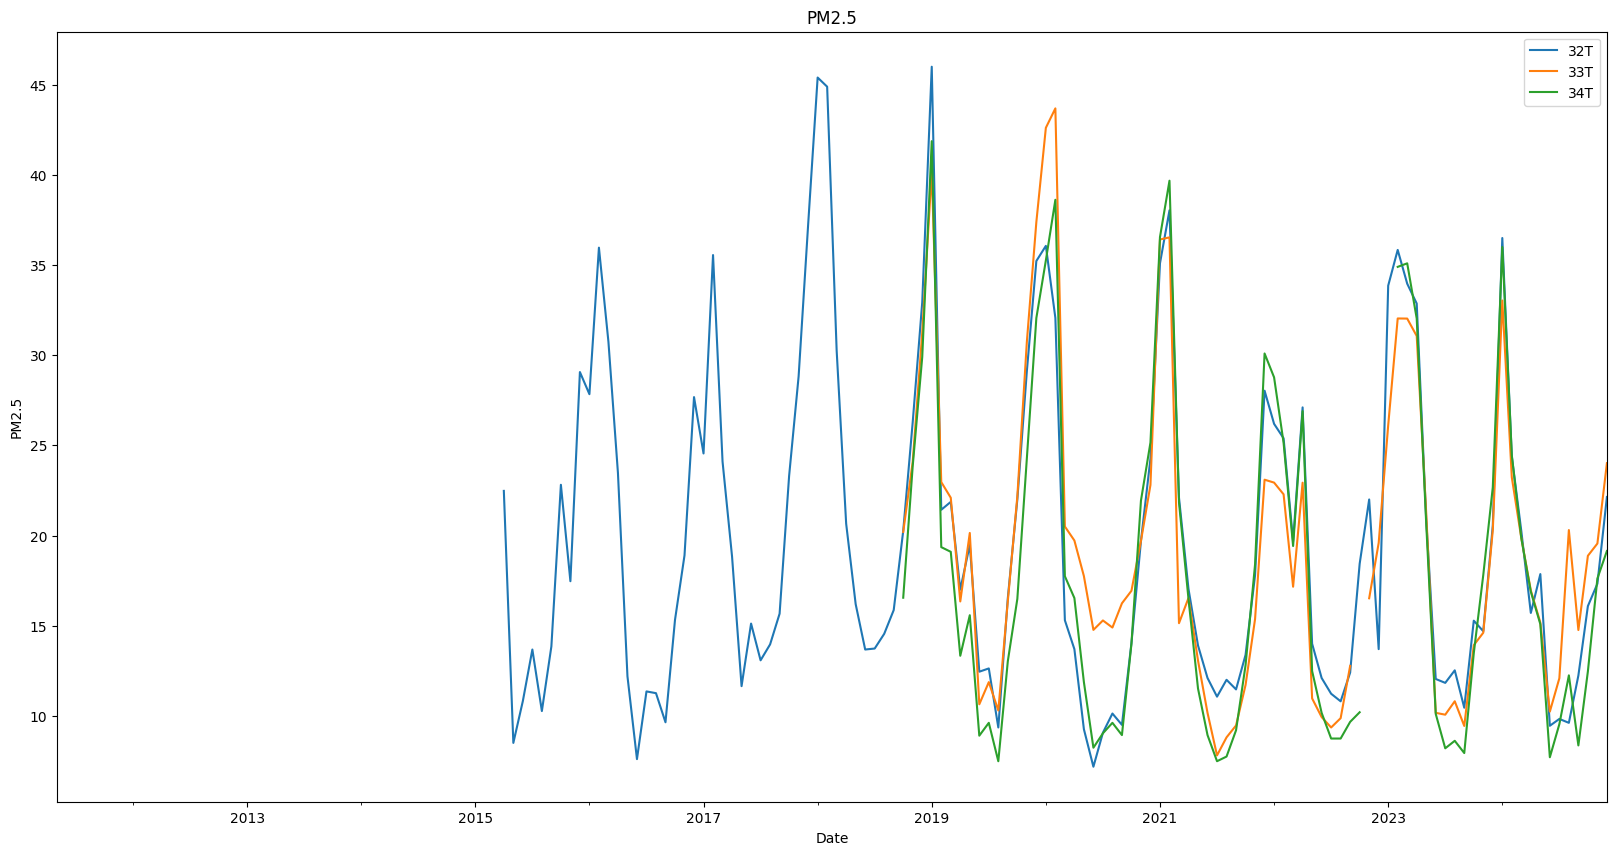

In [16]:
plot_pm2_5("จ.ชลบุรี", 0)

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


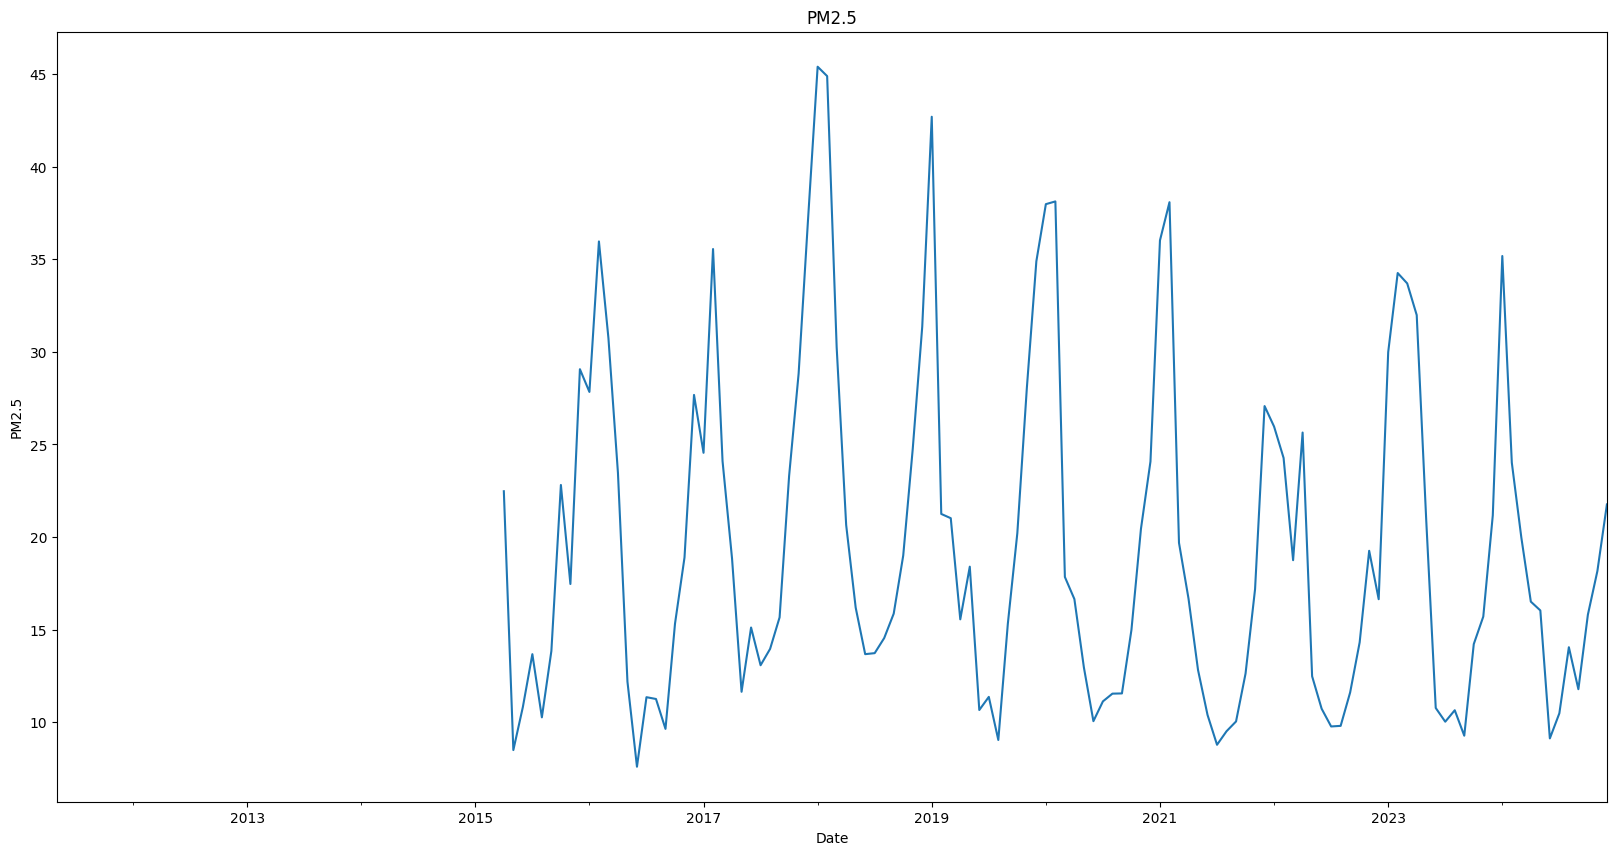

In [17]:
pm_map_chonburi = plot_pm2_5("จ.ชลบุรี", 1)
series = pm_map_chonburi["avg"]

In [18]:
series[series.isnull()]

date
2011-05-31   NaN
2011-06-30   NaN
2011-07-31   NaN
2011-08-31   NaN
2011-09-30   NaN
2011-10-31   NaN
2011-11-30   NaN
2011-12-31   NaN
2012-01-31   NaN
2012-02-29   NaN
2012-03-31   NaN
2012-04-30   NaN
2012-05-31   NaN
2012-06-30   NaN
2012-07-31   NaN
2012-08-31   NaN
2012-09-30   NaN
2012-10-31   NaN
2012-11-30   NaN
2012-12-31   NaN
2013-01-31   NaN
2013-02-28   NaN
2013-03-31   NaN
2013-04-30   NaN
2013-05-31   NaN
2013-06-30   NaN
2013-07-31   NaN
2013-08-31   NaN
2013-09-30   NaN
2013-10-31   NaN
2013-11-30   NaN
2013-12-31   NaN
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
2014-06-30   NaN
2014-07-31   NaN
2014-08-31   NaN
2014-09-30   NaN
2014-10-31   NaN
2014-11-30   NaN
2014-12-31   NaN
2015-01-31   NaN
2015-02-28   NaN
2015-03-31   NaN
Freq: ME, Name: avg, dtype: float64

In [19]:
#find the first node that's not null
series[series.notnull()].index[0]

Timestamp('2015-04-30 00:00:00')

All ends at 2015-03-31, no needs to imputes

In [20]:
series = series.dropna()

In [21]:
series[series.isnull()]

Series([], Freq: ME, Name: avg, dtype: float64)

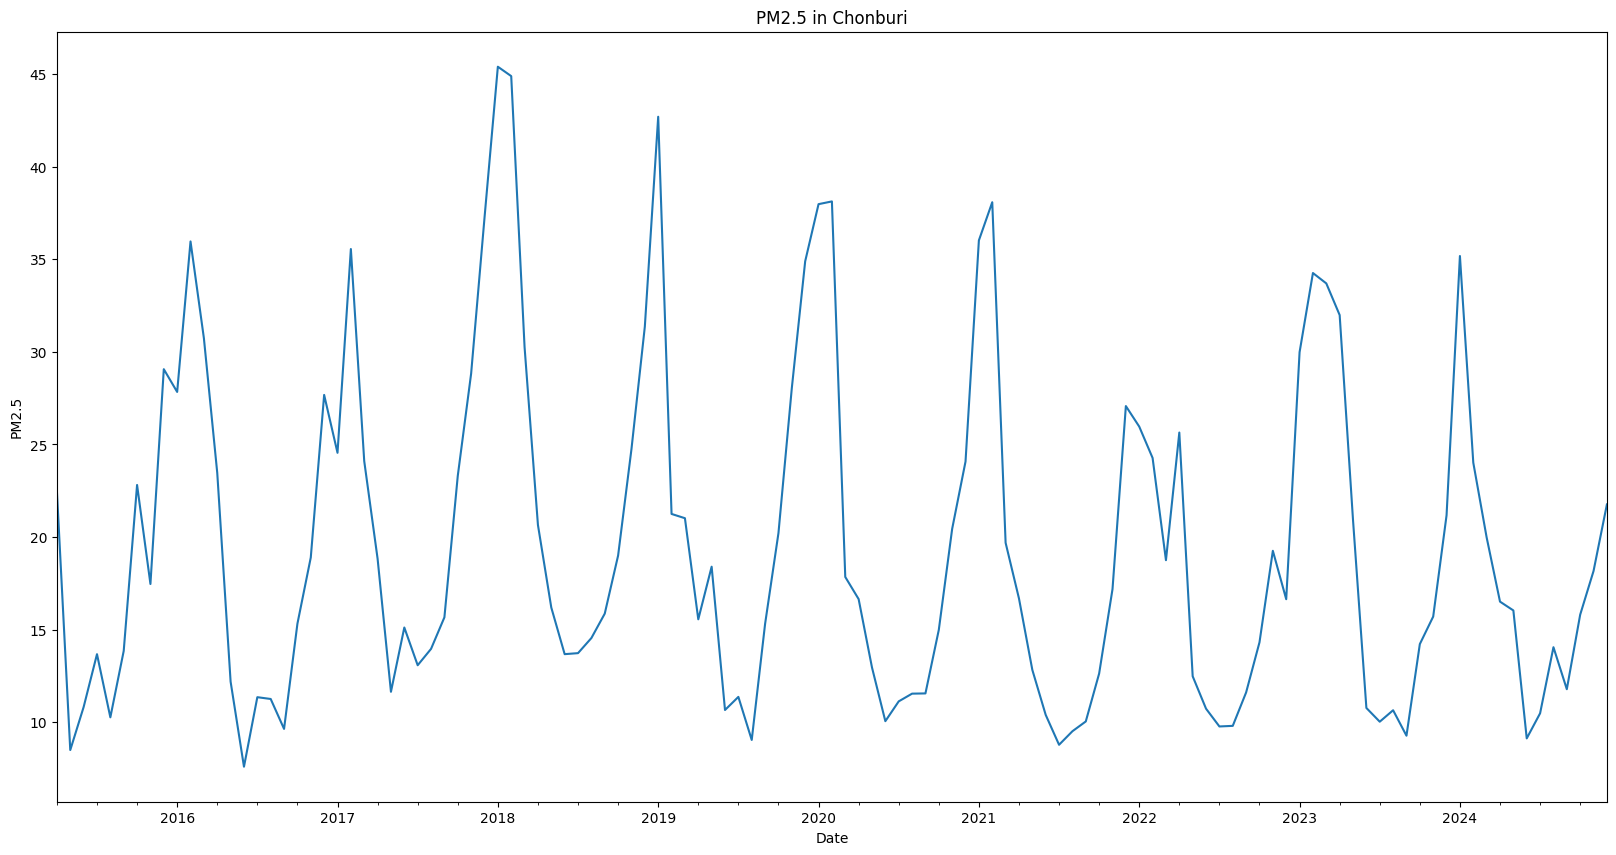

In [22]:
series.plot(figsize=(20, 10))
plt.title("PM2.5 in Chonburi")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

In [23]:
series.to_csv("../../data/a1/chon_pm.csv")

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


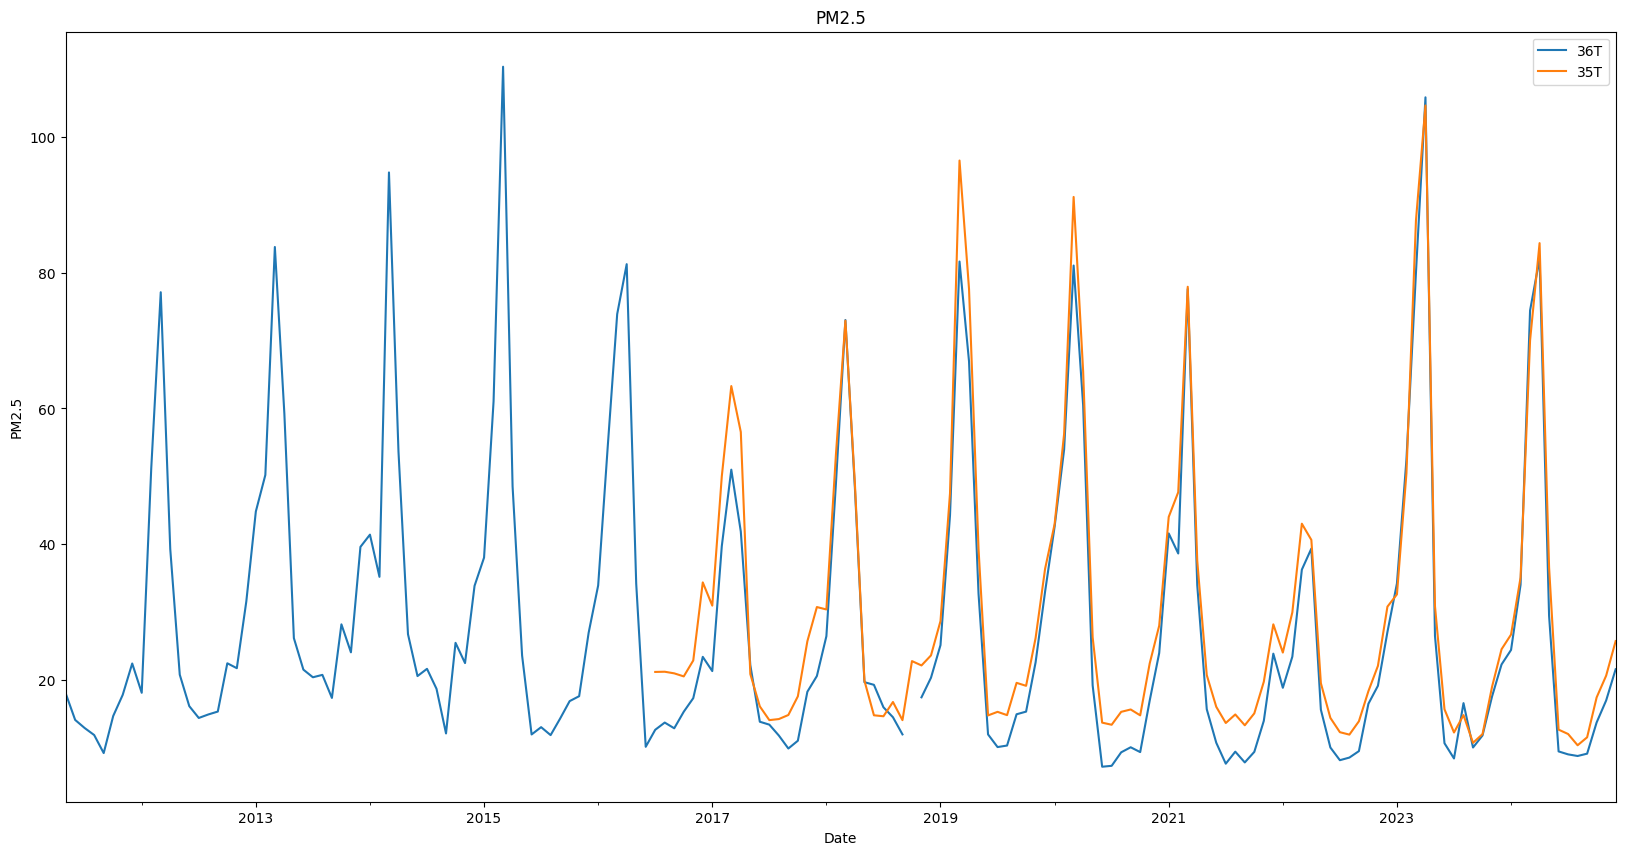

In [24]:
plot_pm2_5("จ.เชียงใหม่", 0)

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


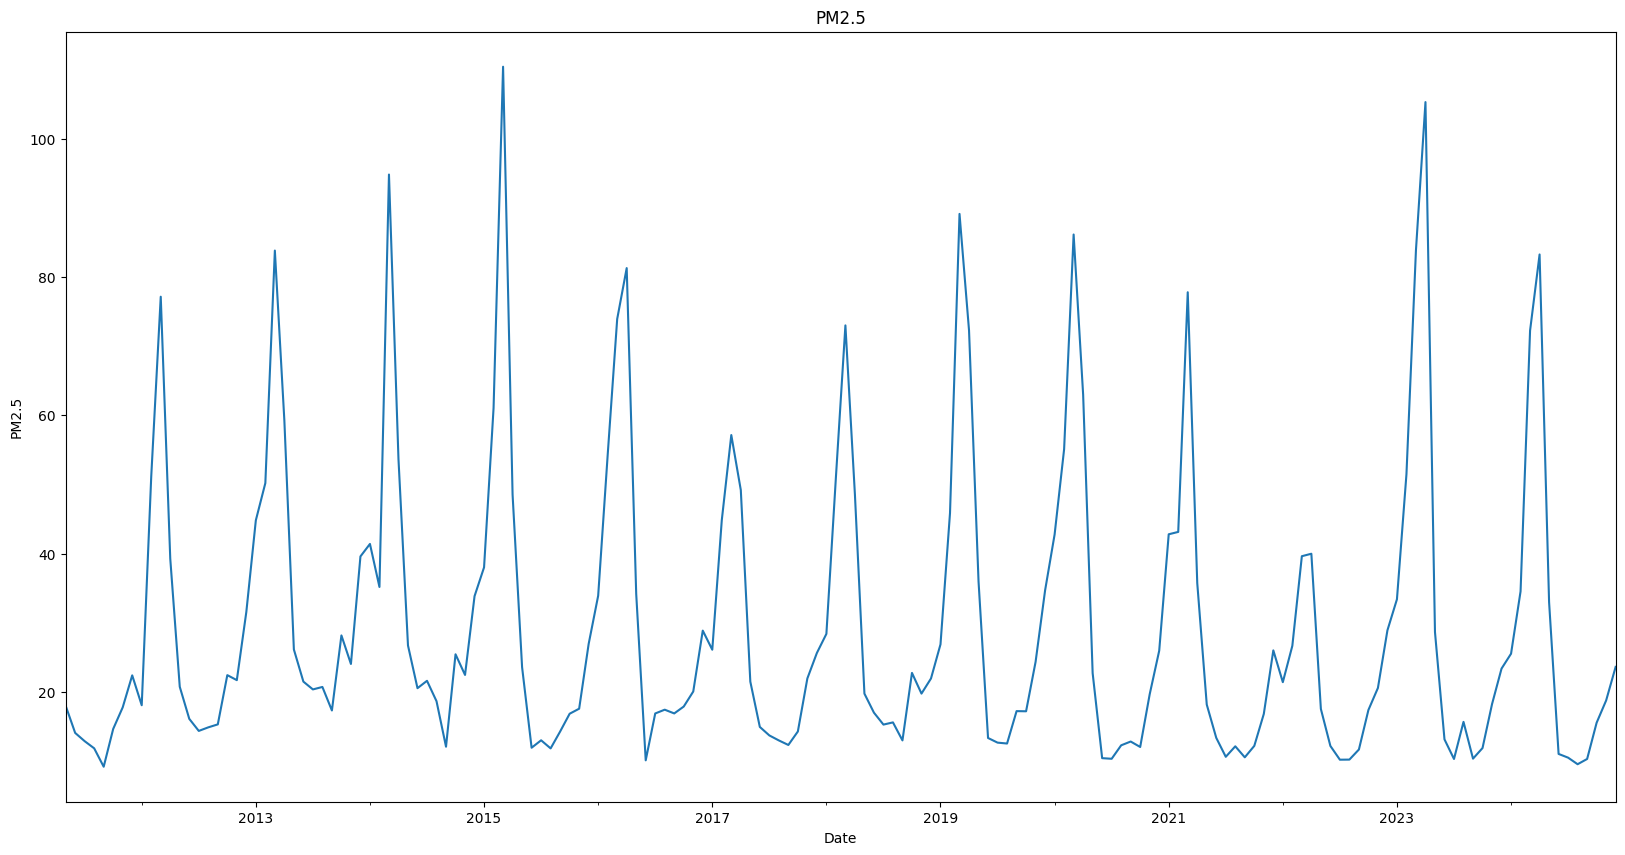

In [25]:
pm_map_chiangmai = plot_pm2_5("จ.เชียงใหม่", 1)
series = pm_map_chiangmai["avg"]

In [26]:
series[series.isnull()]

Series([], Freq: ME, Name: avg, dtype: float64)

In [27]:
series.to_csv("../../data/a1/cnx_pm.csv")

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


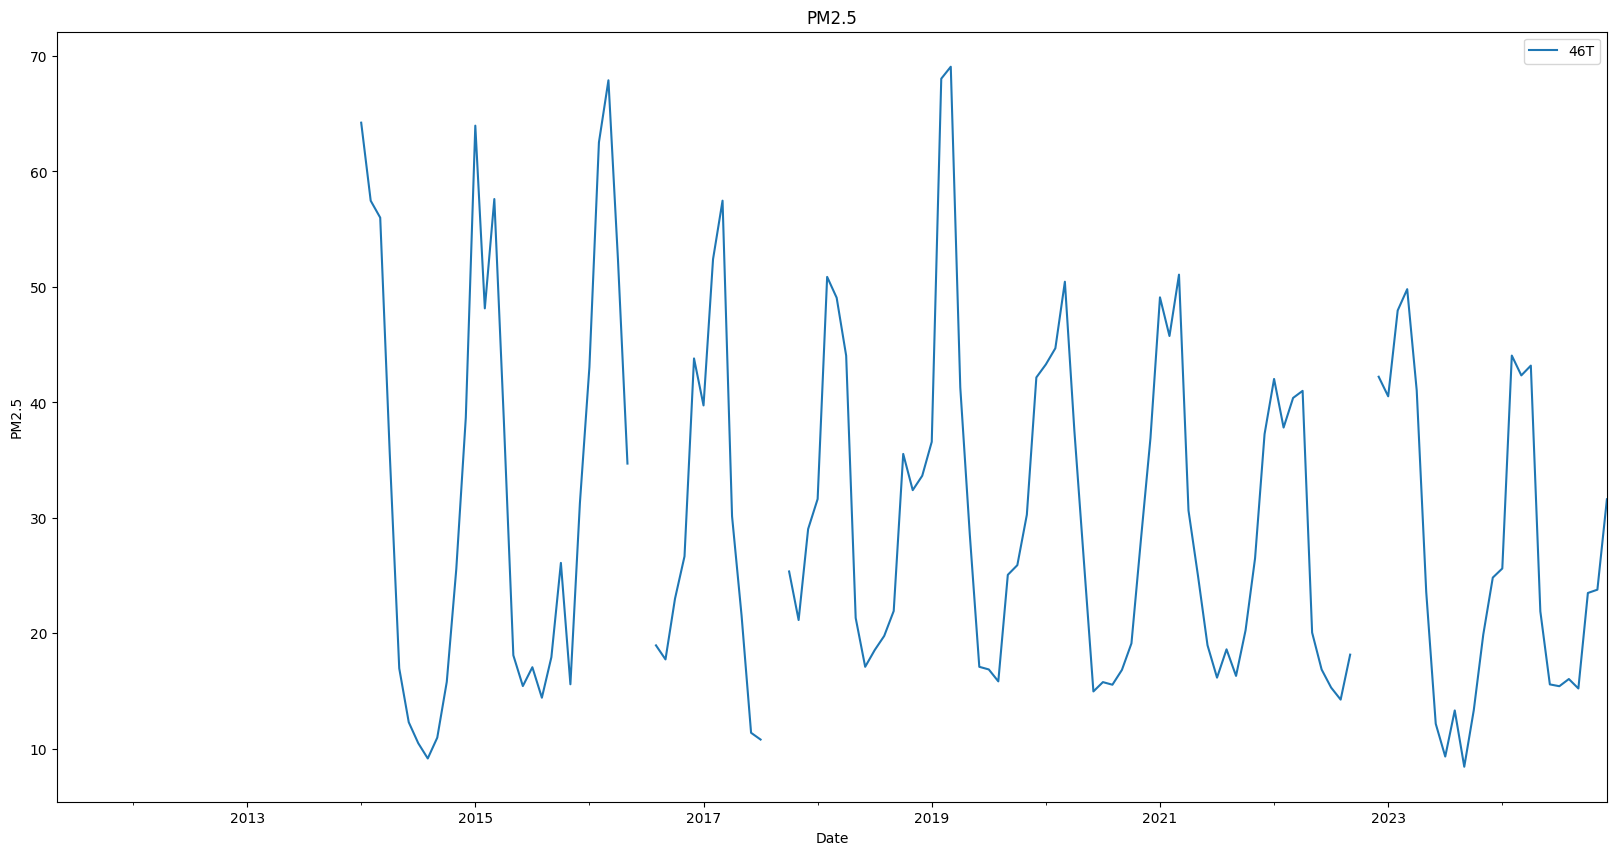

In [28]:
plot_pm2_5("จ.ขอนแก่น", 0)

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


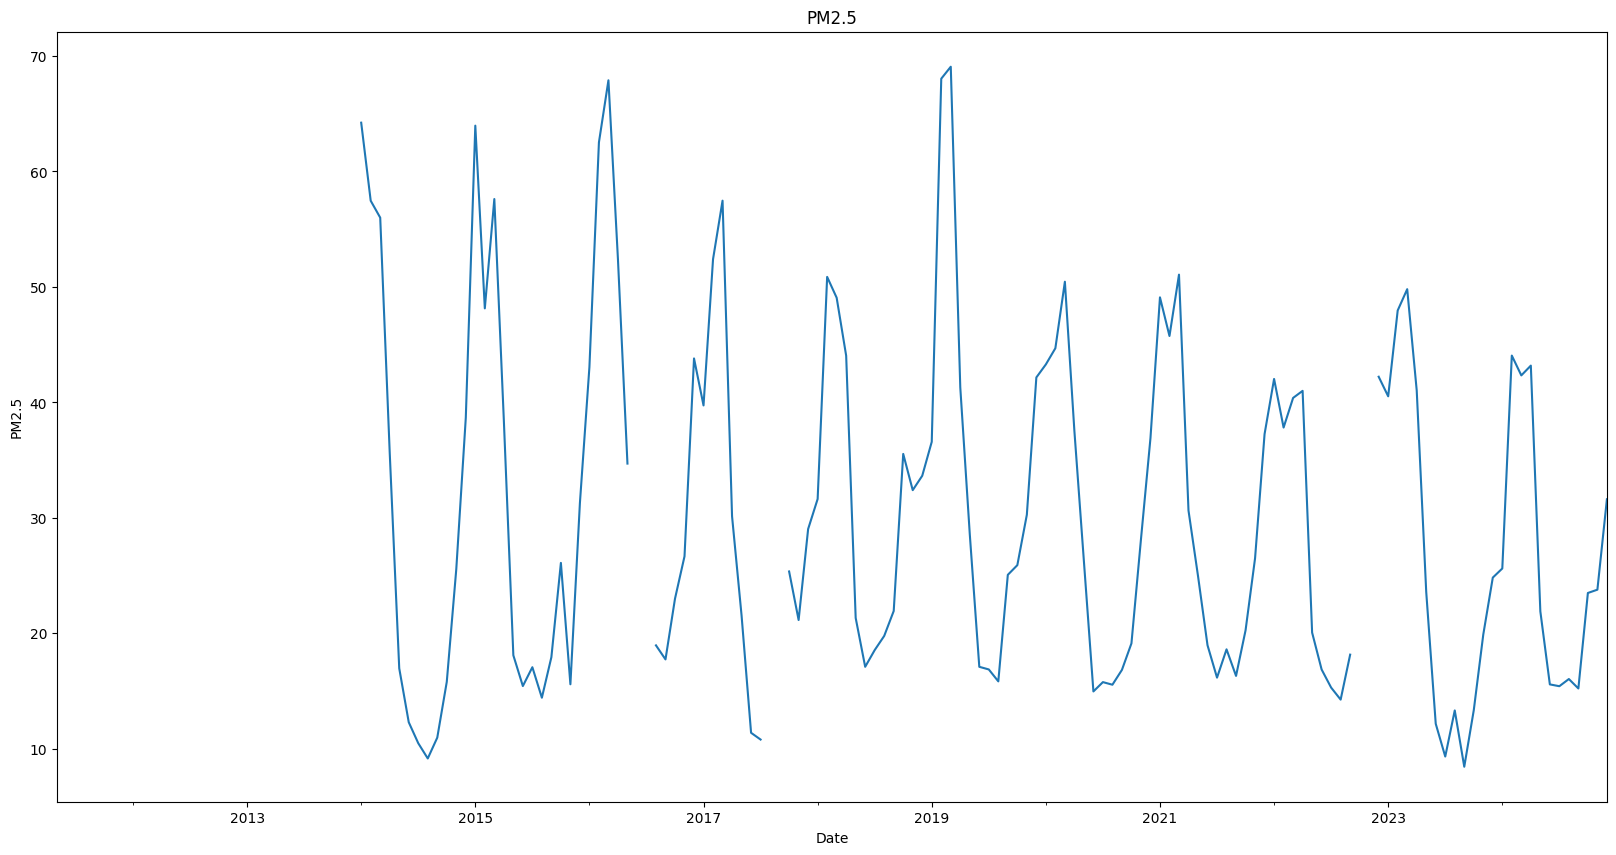

In [29]:
pm_map_konkaen = plot_pm2_5("จ.ขอนแก่น", 1)
series = pm_map_konkaen["avg"]

In [30]:
series[series.isnull()]

date
2011-05-31   NaN
2011-06-30   NaN
2011-07-31   NaN
2011-08-31   NaN
2011-09-30   NaN
2011-10-31   NaN
2011-11-30   NaN
2011-12-31   NaN
2012-01-31   NaN
2012-02-29   NaN
2012-03-31   NaN
2012-04-30   NaN
2012-05-31   NaN
2012-06-30   NaN
2012-07-31   NaN
2012-08-31   NaN
2012-09-30   NaN
2012-10-31   NaN
2012-11-30   NaN
2012-12-31   NaN
2013-01-31   NaN
2013-02-28   NaN
2013-03-31   NaN
2013-04-30   NaN
2013-05-31   NaN
2013-06-30   NaN
2013-07-31   NaN
2013-08-31   NaN
2013-09-30   NaN
2013-10-31   NaN
2013-11-30   NaN
2013-12-31   NaN
2016-06-30   NaN
2016-07-31   NaN
2017-08-31   NaN
2017-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
Name: avg, dtype: float64

In [31]:
series[series.notnull()].index[0]

Timestamp('2014-01-31 00:00:00')

In [32]:
first_valid_index = series[series.notnull()].index[0]
series = series.loc[first_valid_index:]

In [33]:
series[series.isnull()]

date
2016-06-30   NaN
2016-07-31   NaN
2017-08-31   NaN
2017-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
Name: avg, dtype: float64

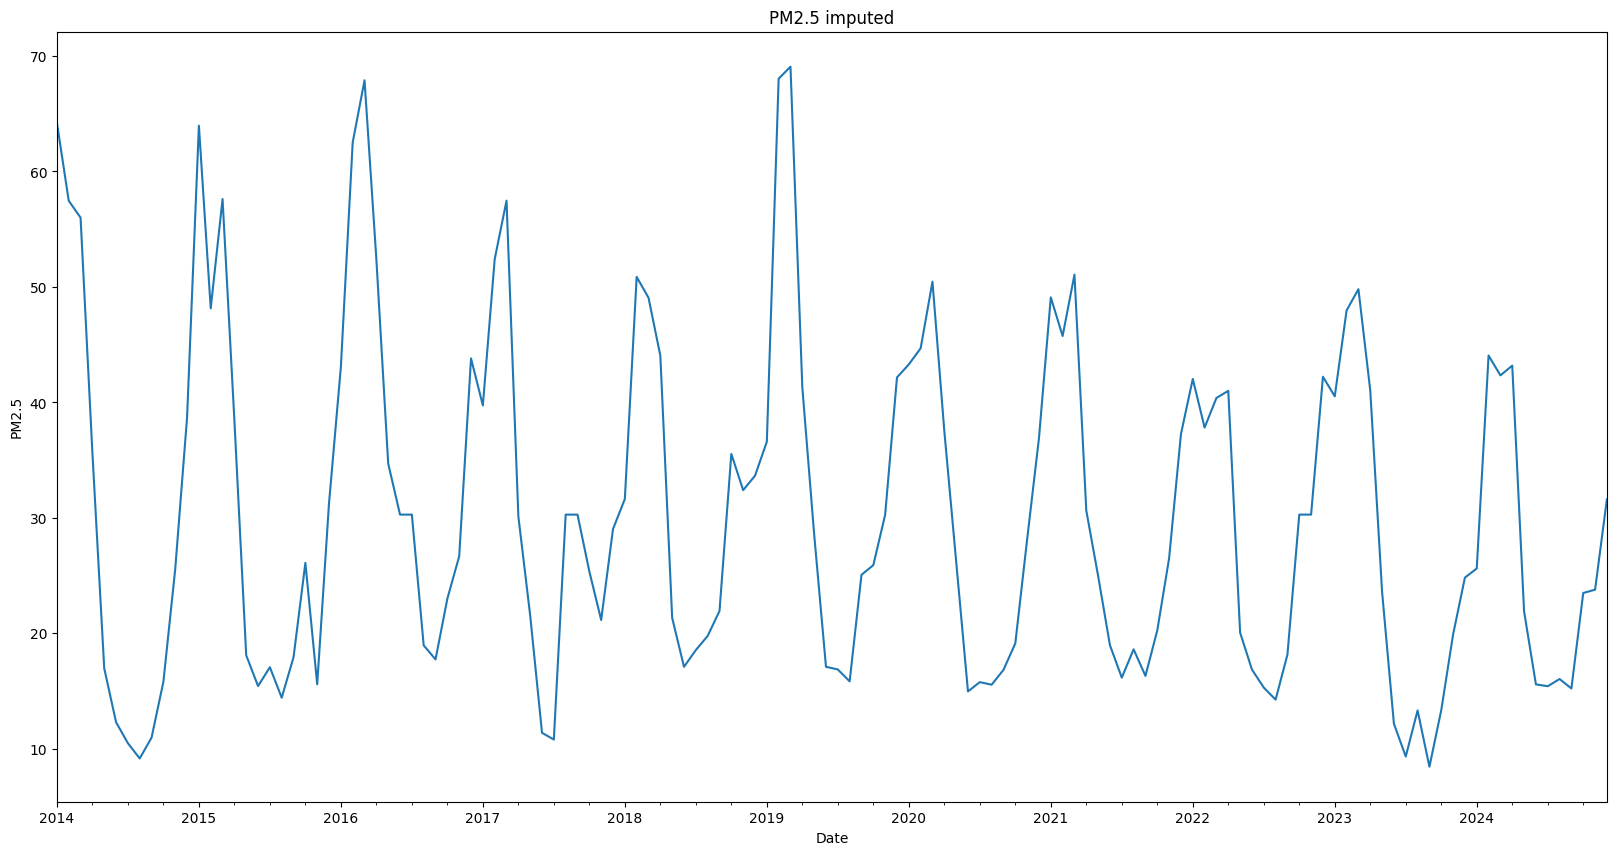

In [34]:
imputed_series = series.copy()

imputed_series['avg'] = imputed(series)

In [35]:
imputed_series.to_csv("../../data/a1/kk_pm.csv")

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


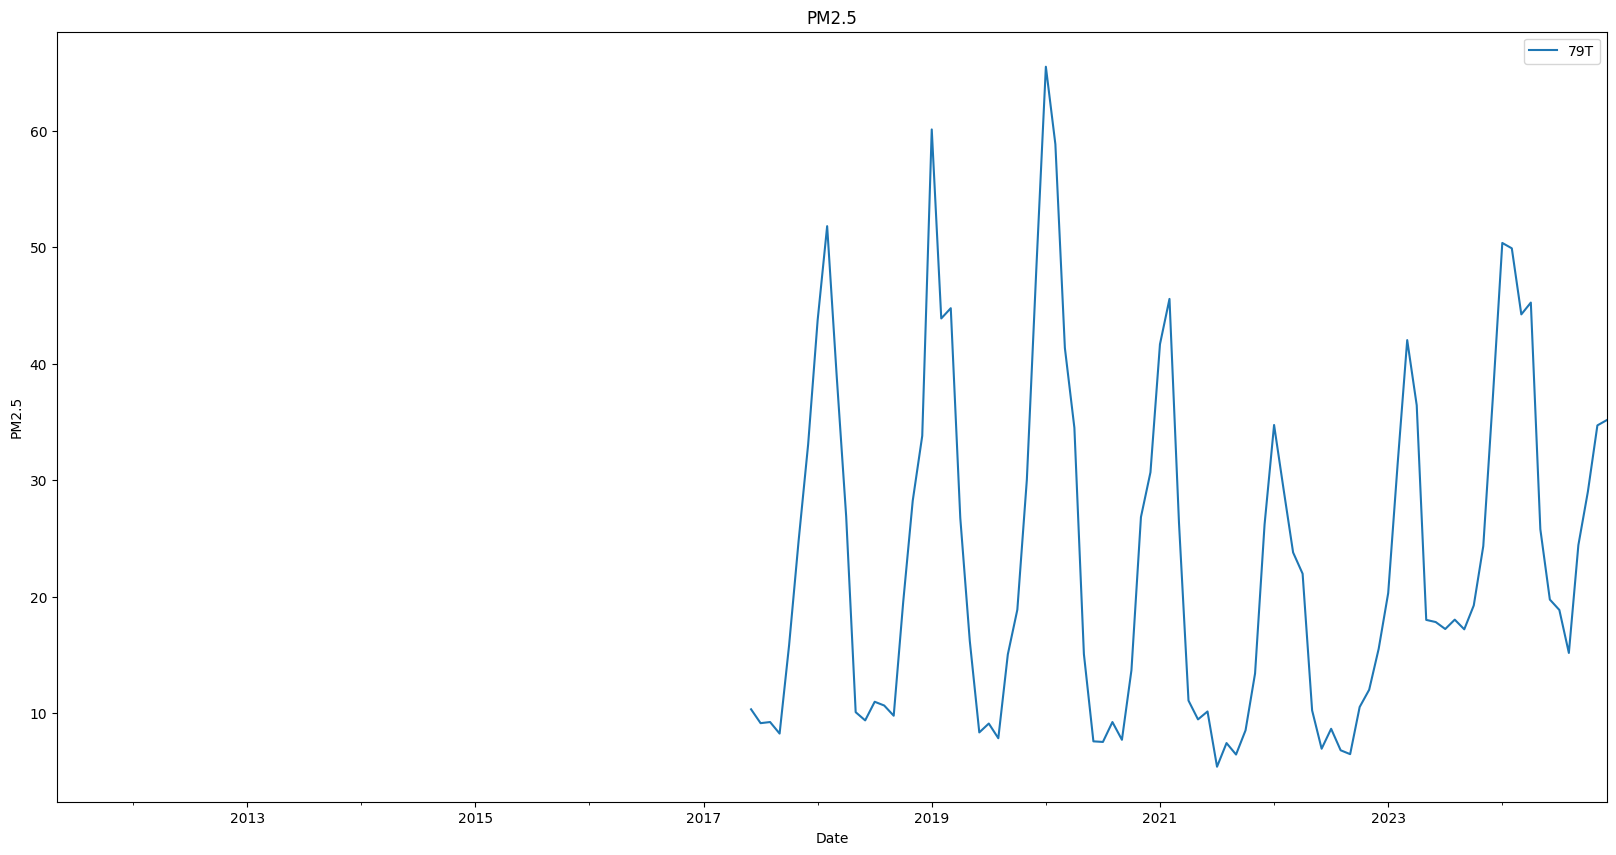

In [36]:
plot_pm2_5("จ.กาญจนบุรี", 0)

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


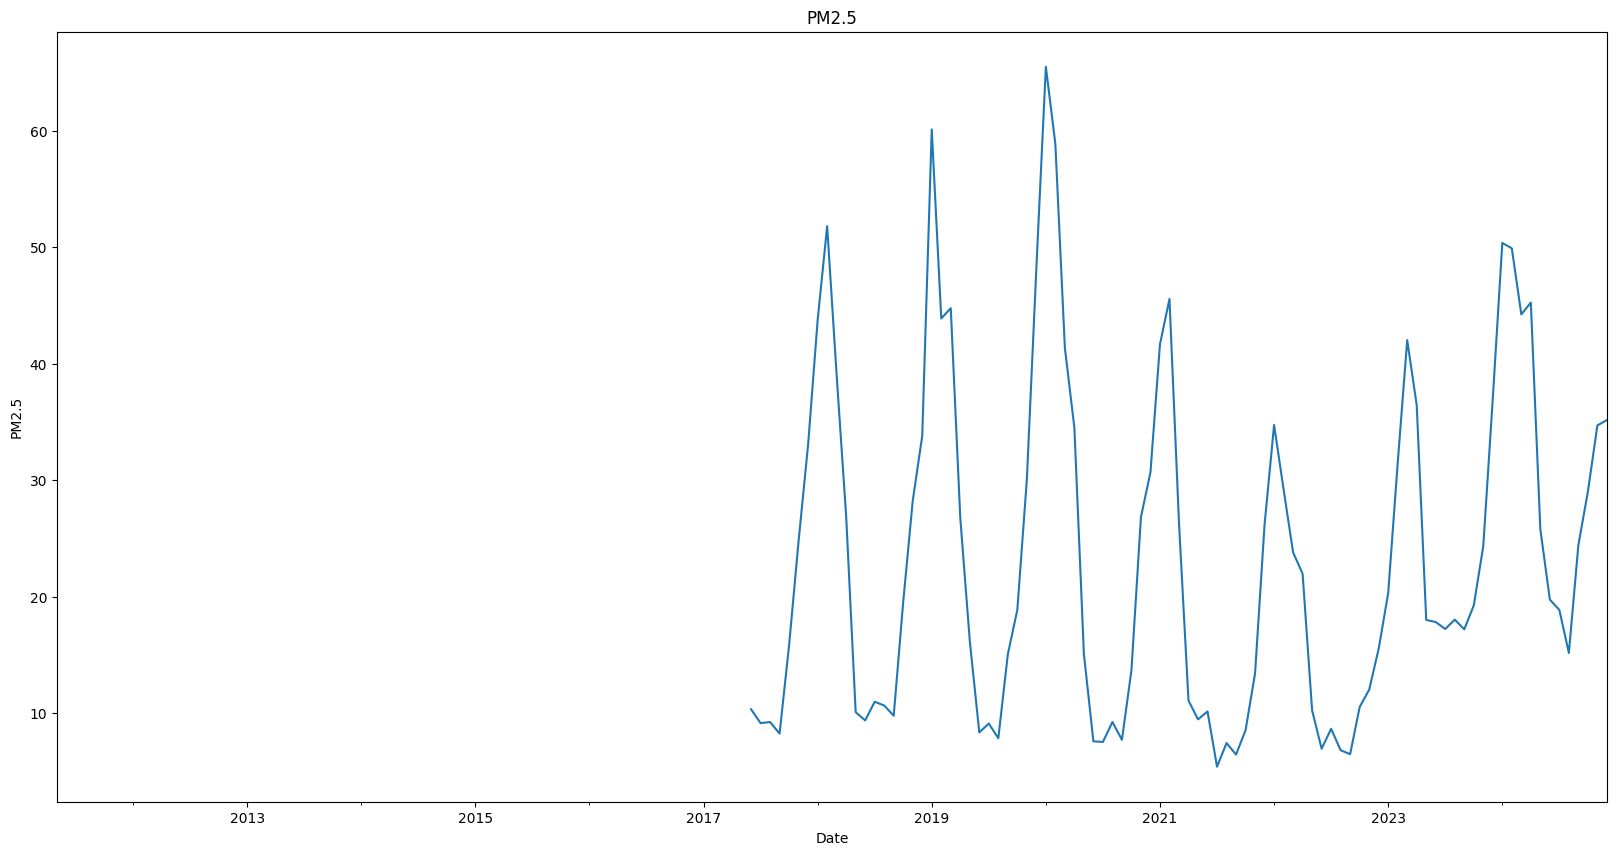

In [37]:
pm_map_karn = plot_pm2_5("จ.กาญจนบุรี", 1)
series = pm_map_karn["avg"]

In [38]:
series[series.isnull()]

date
2011-05-31   NaN
2011-06-30   NaN
2011-07-31   NaN
2011-08-31   NaN
2011-09-30   NaN
              ..
2017-01-31   NaN
2017-02-28   NaN
2017-03-31   NaN
2017-04-30   NaN
2017-05-31   NaN
Freq: ME, Name: avg, Length: 73, dtype: float64

In [39]:
first_valid_index = series[series.notnull()].index[0]
series = series.loc[first_valid_index:]
series[series.isnull()]

Series([], Freq: ME, Name: avg, dtype: float64)

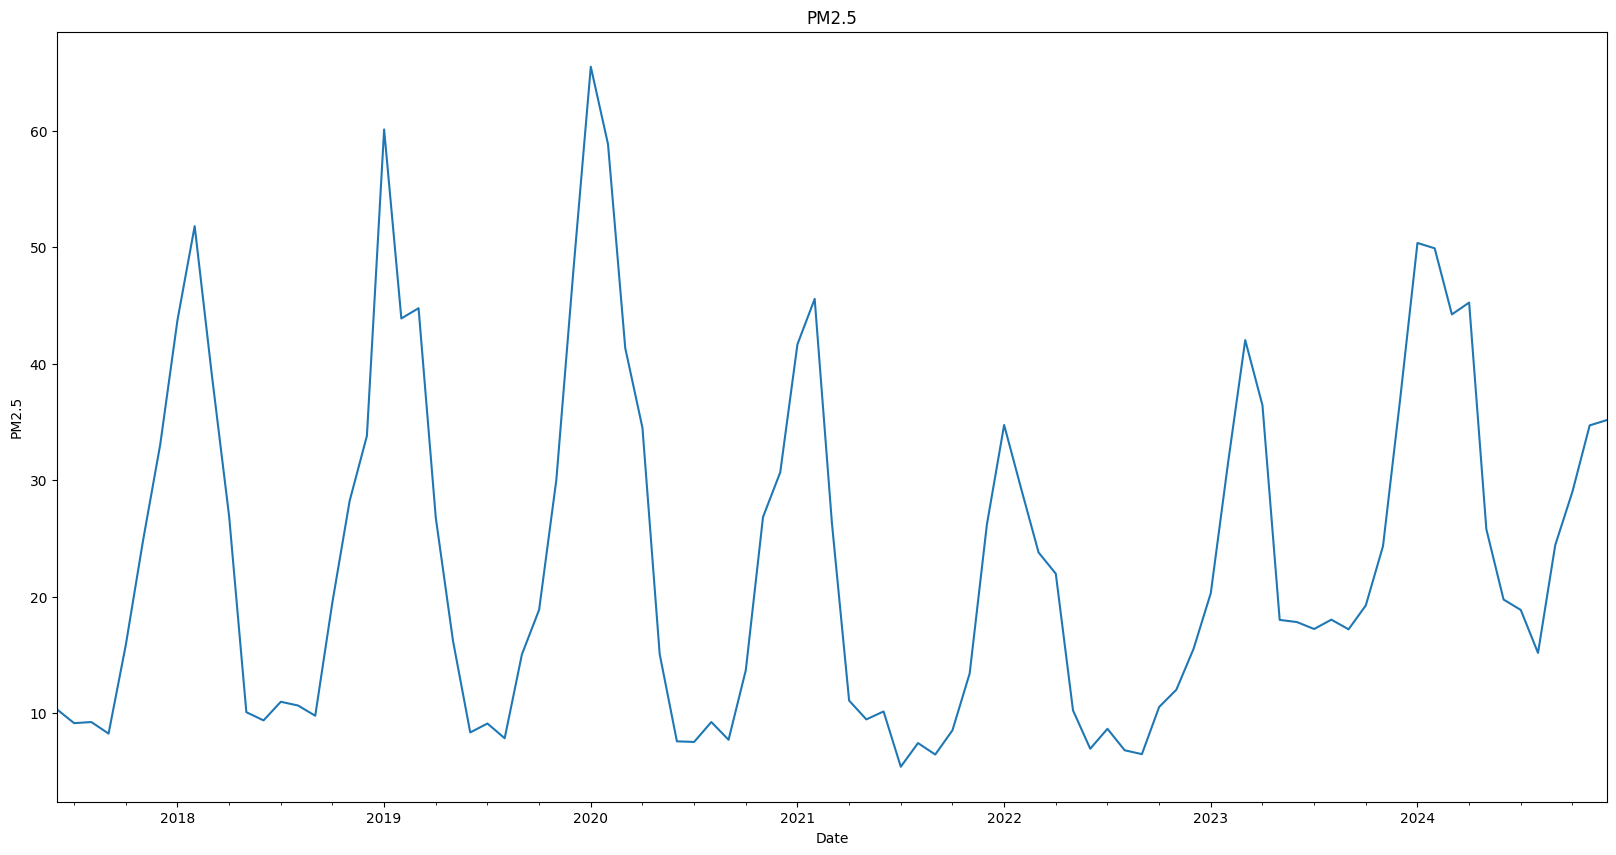

In [40]:
series.plot(figsize=(20, 10))
plt.title("PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

In [41]:
series.to_csv("../../data/a1/kcn_pm.csv")

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


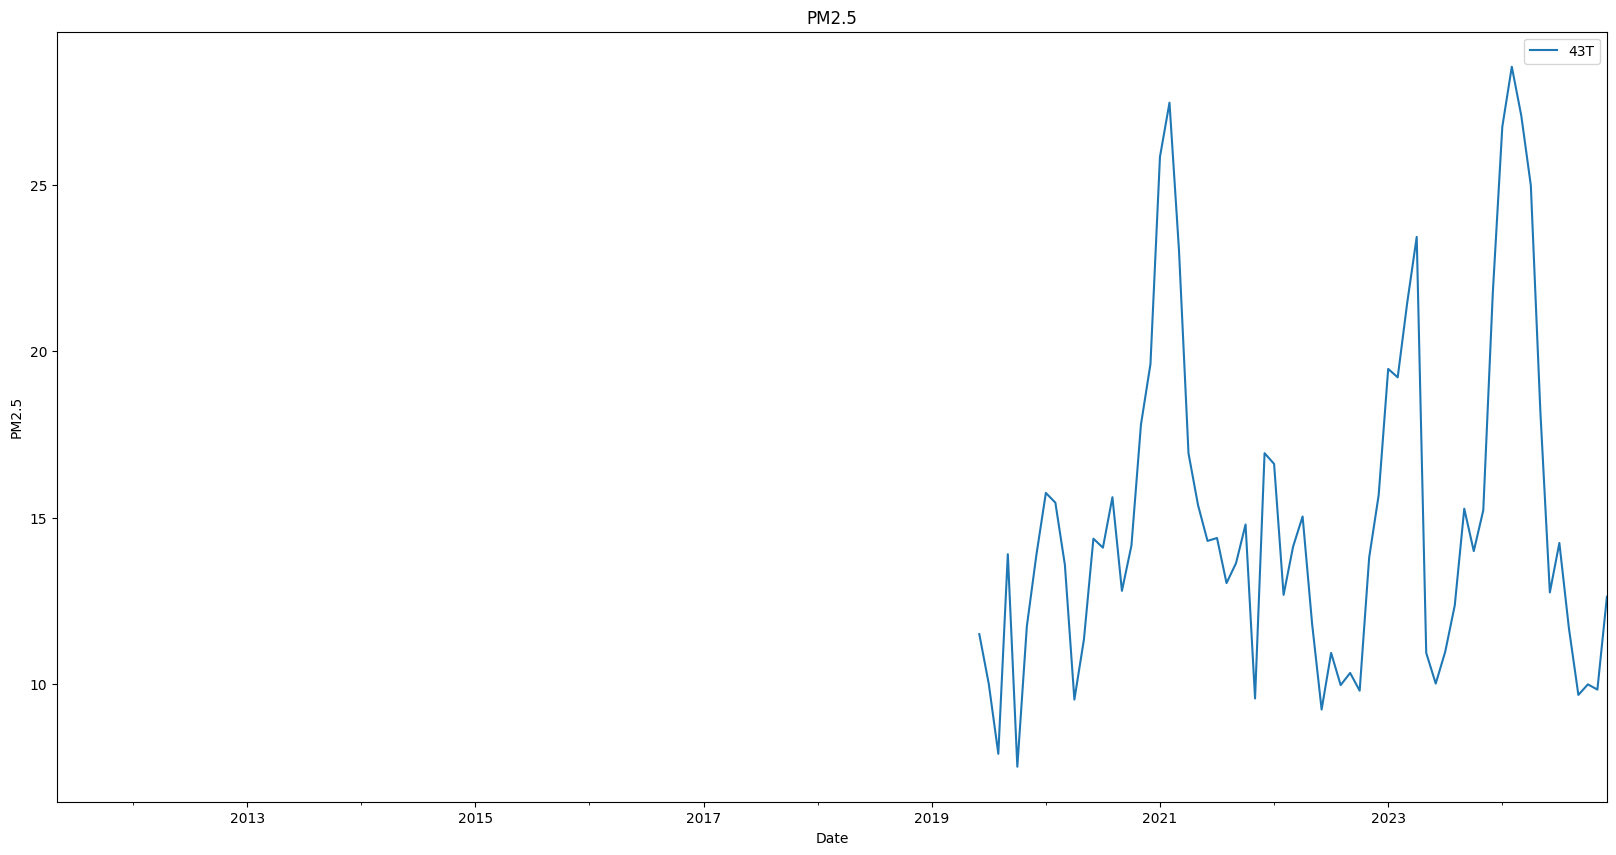

In [42]:
plot_pm2_5("จ.ภูเก็ต", 0)

/var/folders/yz/zvlp09kd3l12735_165qzk0c0000gn/T/ipykernel_7923/3746358376.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_local = pm_map_local.resample("M").mean()


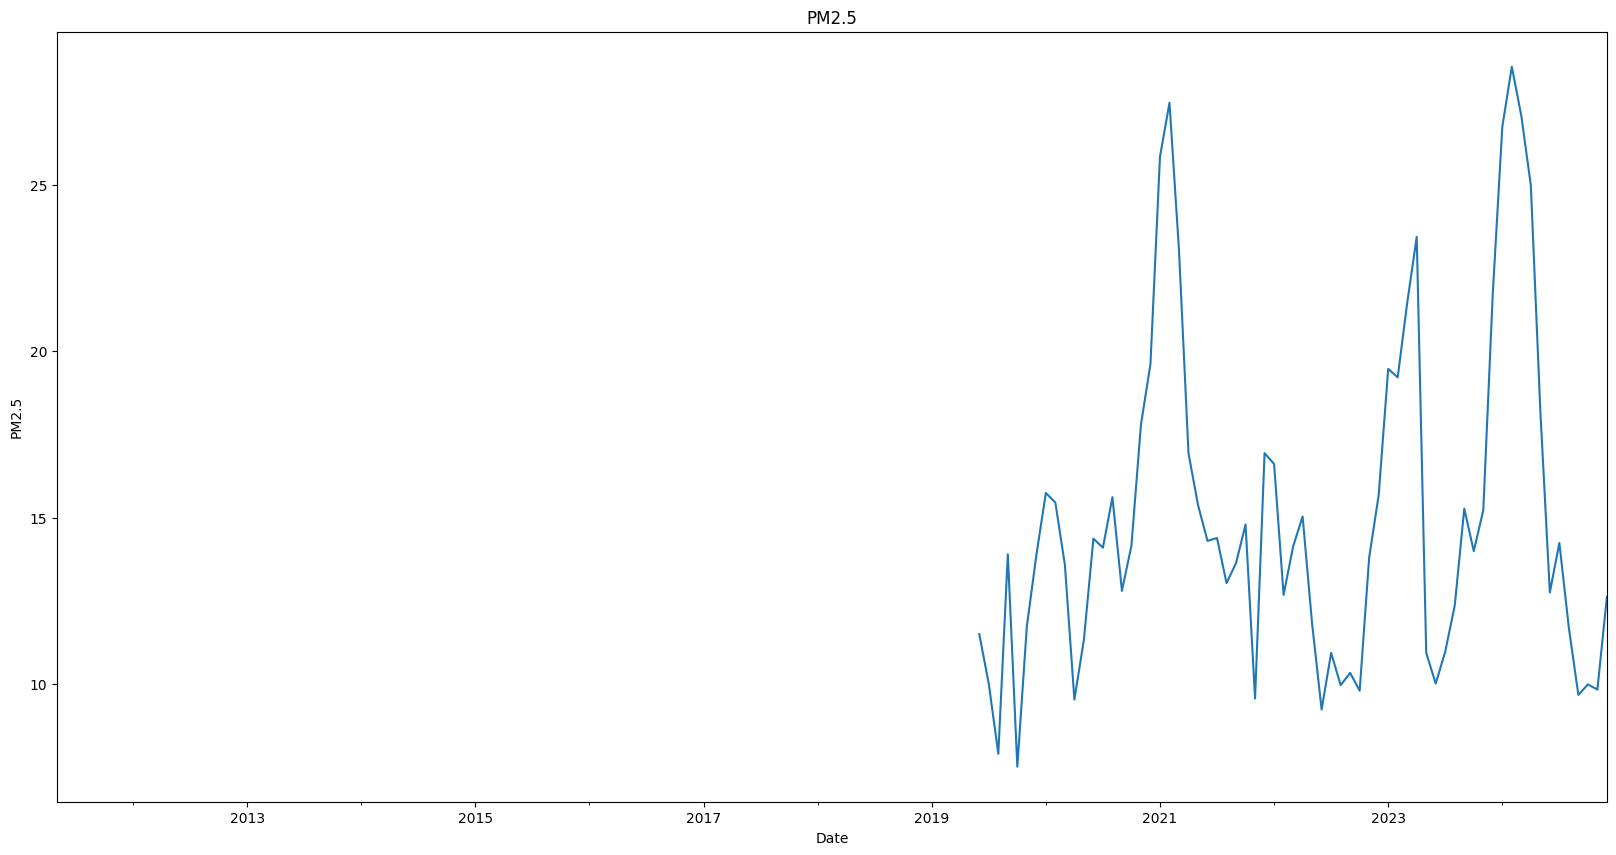

In [43]:
pm_map_phukhet = plot_pm2_5("จ.ภูเก็ต", 1)
series = pm_map_phukhet["avg"]

In [44]:
series[series.isnull()]

date
2011-05-31   NaN
2011-06-30   NaN
2011-07-31   NaN
2011-08-31   NaN
2011-09-30   NaN
              ..
2019-01-31   NaN
2019-02-28   NaN
2019-03-31   NaN
2019-04-30   NaN
2019-05-31   NaN
Freq: ME, Name: avg, Length: 97, dtype: float64

In [45]:
first_valid_index = series[series.notnull()].index[0]
series = series.loc[first_valid_index:]
series[series.isnull()]

Series([], Freq: ME, Name: avg, dtype: float64)

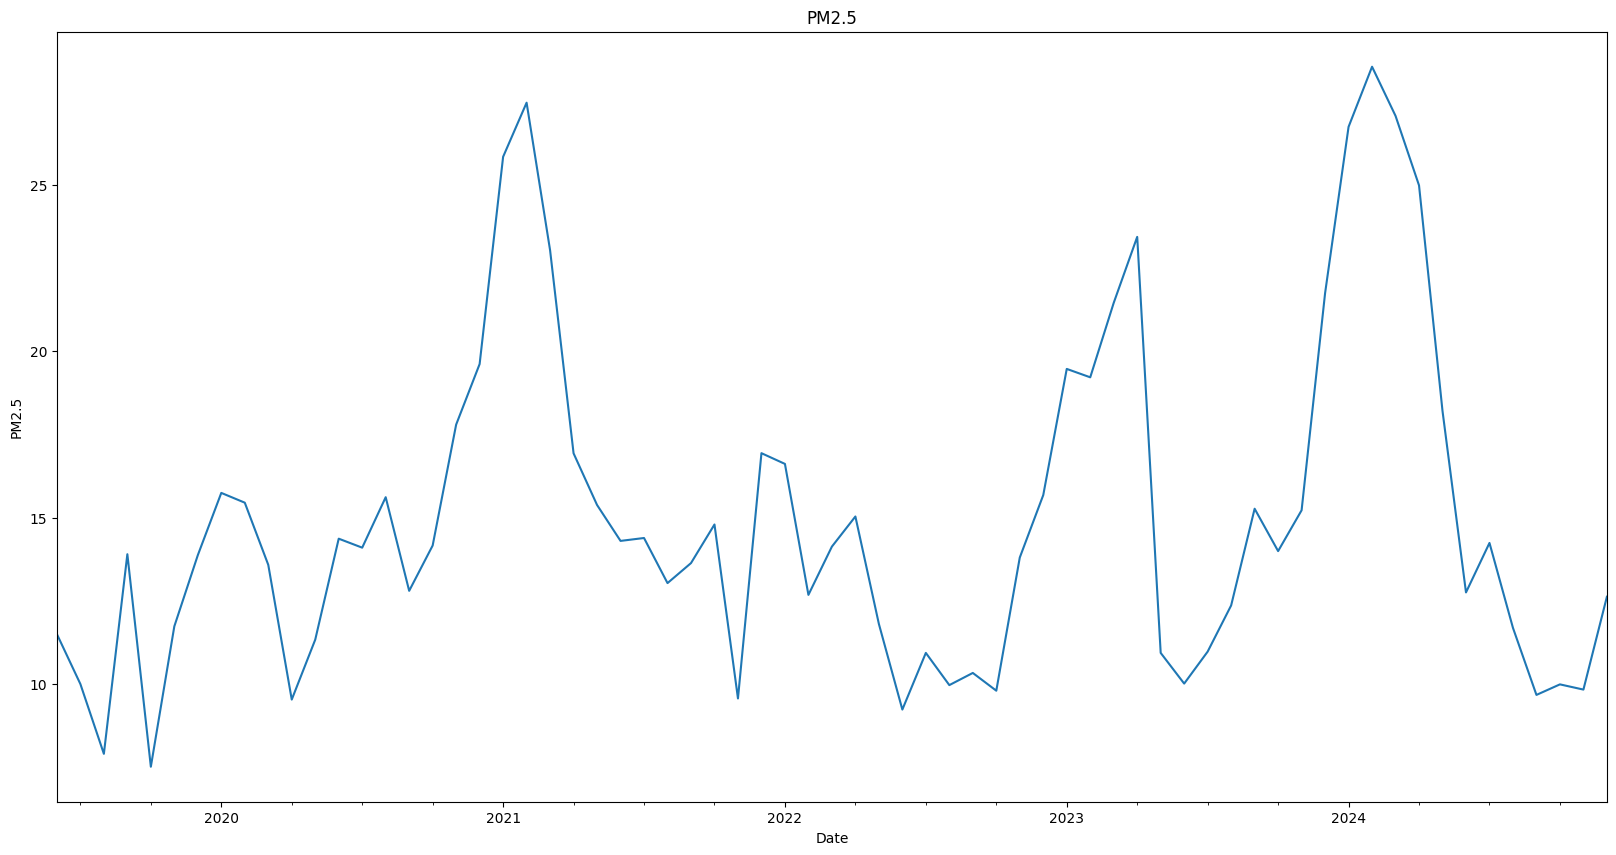

In [46]:
series.plot(figsize=(20, 10))
plt.title("PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

In [47]:
series.to_csv("../../data/a1/pk_pm.csv")